# SVM Hyperparameter Tuning using GridSearchCV
Performing SVM on cicago air quality index 

# 1. Loading Data from CSV File 

In [1]:
#import all the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

In [2]:
data = pd.read_csv("./AQI2014-2020.csv", na_values = "NaN", index_col=[0],parse_dates=['Date'], date_parser = pd.to_datetime )
data.head()

,Site ID,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,STATE_CODE,STATE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,POC
Date,,,,,,,,,,,
2014-01-01,170310001,10.9,ug/m3 LC,45,VILLAGE GARAGE,17,Illinois,Cook,41.670992,-87.732457,1
2014-01-01,170310057,8.4,ug/m3 LC,35,SPRINGFIELD PUMP STATION,17,Illinois,Cook,41.912739,-87.722673,1
2014-01-01,170310076,6.1,ug/m3 LC,25,COM ED MAINTENANCE BLDG,17,Illinois,Cook,41.751400,-87.713488,1
2014-01-01,170314201,7.6,ug/m3 LC,32,NORTHBROOK WATER PLANT,17,Illinois,Cook,42.139996,-87.799227,1
2014-01-01,170316005,8.3,ug/m3 LC,35,LIBERTY SCHOOL,17,Illinois,Cook,41.864426,-87.748902,1


In [3]:
# data.drop(data[data.POC > 2].index, inplace=True)

In [4]:
data.shape

(20545, 11)

In [5]:
data.size

225995

In [6]:
data.count()

Site ID                           20545
Daily Mean PM2.5 Concentration    20545
UNITS                             20545
DAILY_AQI_VALUE                   20545
Site Name                         20545
STATE_CODE                        20545
STATE                             20545
COUNTY                            20545
SITE_LATITUDE                     20545
SITE_LONGITUDE                    20545
POC                               20545
dtype: int64

# 2. Distribution of Class 

In [7]:
data['POC'].value_counts()

1    15373
2     5145
4       15
3       12
Name: POC, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


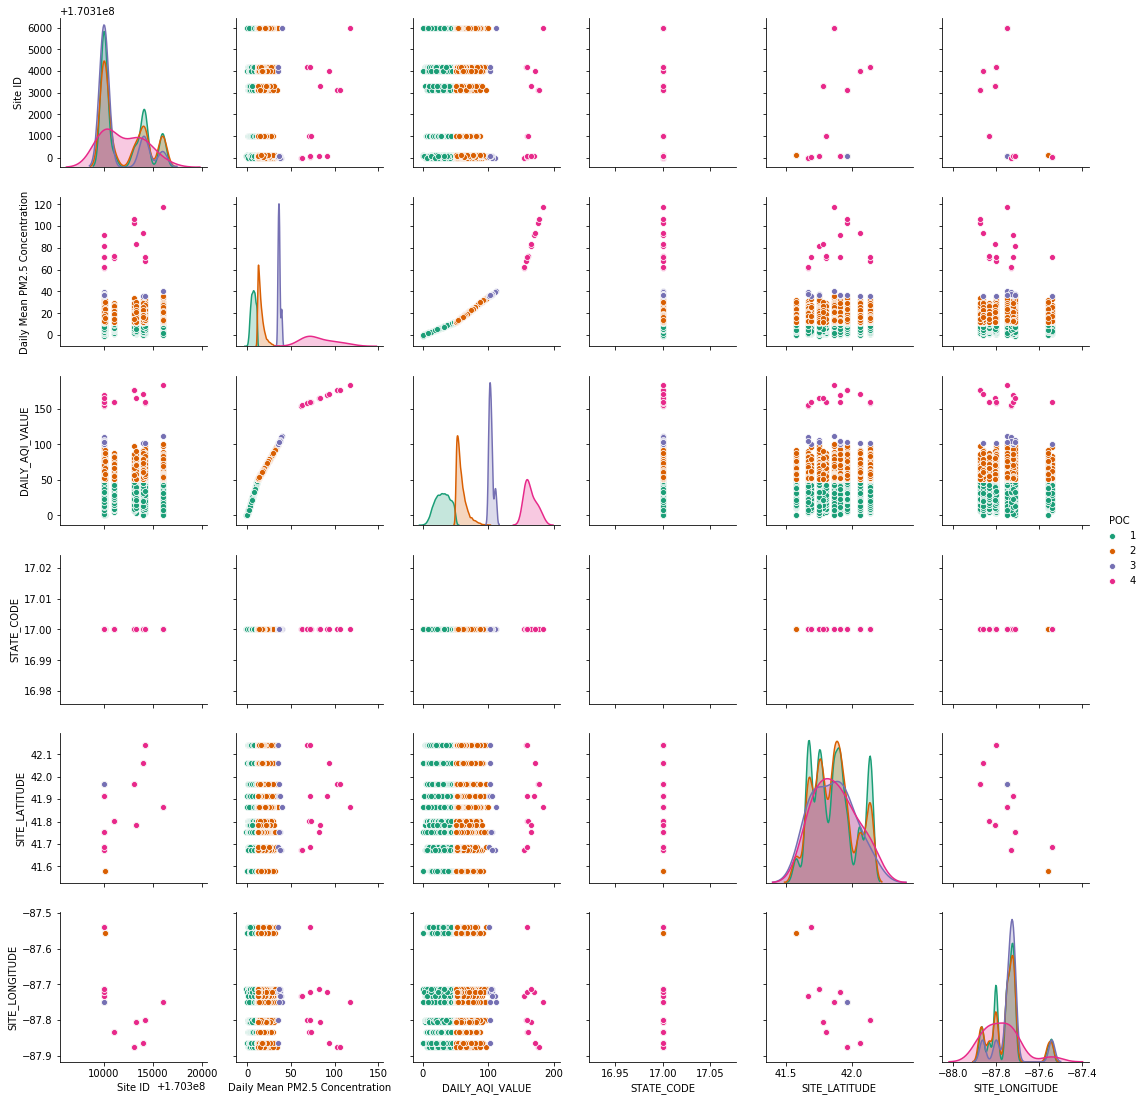

In [8]:

sns.pairplot(data,hue='POC',palette='Dark2')

In [9]:
good_data = data[data['POC']==1][0:600]
moderate_data = data[data['POC']==2][0:600]
sensitive_data = data[data['POC']==3][0:600]
very_sensitive_data = data[data['POC']==4][0:600]

In [10]:
# axes = good_data.plot(kind='scatter',x='Date', y='AQI', color='green', label='Good')
# moderate_data.plot(kind='scatter', x='Clump', y='UnifSize', color='orange', label='Moderate')
# axes = sensitive_data.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Sensitive')

# 3. Removing of unwanted columns 

In [11]:
data.dtypes

Site ID                             int64
Daily Mean PM2.5 Concentration    float64
UNITS                              object
DAILY_AQI_VALUE                     int64
Site Name                          object
STATE_CODE                          int64
STATE                              object
COUNTY                             object
SITE_LATITUDE                     float64
SITE_LONGITUDE                    float64
POC                                 int64
dtype: object

In [12]:
data.columns


Index(['Site ID', 'Daily Mean PM2.5 Concentration', 'UNITS', 'DAILY_AQI_VALUE',
       'Site Name', 'STATE_CODE', 'STATE', 'COUNTY', 'SITE_LATITUDE',
       'SITE_LONGITUDE', 'POC'],
      dtype='object')

In [13]:
# data.drop(['UNITS',
#        'Site Name', 'STATE', 'COUNTY'], axis=1, inplace=True)

data.drop(['Site ID', 'Daily Mean PM2.5 Concentration', 'UNITS',
       'Site Name', 'STATE_CODE', 'STATE', 'COUNTY', 'SITE_LATITUDE',
       'SITE_LONGITUDE'], axis=1, inplace=True)

In [14]:
#data.set_index('Date', inplace=True)


In [15]:
X= data.drop(['POC'], axis=1)
y=data['POC']



In [16]:
X

,DAILY_AQI_VALUE
Date,
2014-01-01,45
2014-01-01,35
2014-01-01,25
2014-01-01,32
2014-01-01,35
...,...
2020-12-31,47
2020-12-31,58
2020-12-31,61


# 4. Train/Test dataset 
Spliting the data into a training set and a testing set.

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16436, 1)
(16436,)
(4109, 1)
(4109,)


# Applying kernels to transform the data to a higher dimension 

In [18]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

# 5. Train the model
implement the SVC() model from sklearn and fit the model to the training data
Precision, recall and f1 score would be able to portray which kernel performs best 


In [19]:
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4624
           2       1.00      1.00      1.00      1532
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         5

    accuracy                           1.00      6164
   macro avg       1.00      1.00      1.00      6164
weighted avg       1.00      1.00      1.00      6164

Evaluation: RBF kernel
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4637
           2       1.00      1.00      1.00      1518
           3       1.00      0.33      0.50         6
           4       1.00      0.33      0.50         3

    accuracy                           1.00      6164
   macro avg       1.00      0.67      0.75      6164
weighted avg       1.00      1.00      1.00      6164

Evaluation: Sigmoid kernel
              precision    recall  f1-score   supp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 6. Tuning the hyper-parameters using GridSearchCV
In order to improve the model accuracy, several parameters can be tuned (Kernels, 
C,
gamma)


In [21]:
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [1,0.1,0.001,0.0001],'kernel': ['poly', 'sigmoid', 'linear','rbf']}

In [22]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   1.4s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   1.4s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   1.4s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   1.3s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   1.3s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[CV] ................... C=1, gamma=0.0001, kernel=poly, total=   0.4s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV] ................... C=1, gamma=0.0001, kernel=poly, total=   0.3s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ................ C=1, gamma=0.0001, kernel=sigmoid, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ................ C=1, gamma=0.0001, kernel=sigmoid, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ................ C=1, gamma=0.0001, kernel=sigmoid, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ................ C=1, gamma=0.0001, kernel=sigmoid, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ................ C=1, gamma=0.0001, kernel=sigmoid, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   3.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   3.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   3.2s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   3.2s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   3.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   1.6s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   1.7s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   1.7s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   1.7s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   1.8s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .

[CV] .................. C=1000, gamma=1, kernel=sigmoid, total=   1.3s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] .................. C=1000, gamma=1, kernel=sigmoid, total=   1.3s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] .................. C=1000, gamma=1, kernel=sigmoid, total=   1.3s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] .................. C=1000, gamma=1, kernel=sigmoid, total=   1.3s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] .................. C=1000, gamma=1, kernel=sigmoid, total=   1.4s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[CV] ................ C=1000, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] ................ C=1000, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=1000, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=1000, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=1000, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=1000, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=1000, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['poly', 'sigmoid', 'linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [23]:
#display the best parameters from the Grid search 
print(grid.best_estimator_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [24]:
# using the best parameter grid create some predictions using the test data, create the classification reports and confusion matrices 

In [25]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output

[[4596    0    0    0]
 [   0 1561    0    0]
 [   0    0    3    0]
 [   0    0    0    4]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4596
           2       1.00      1.00      1.00      1561
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4

    accuracy                           1.00      6164
   macro avg       1.00      1.00      1.00      6164
weighted avg       1.00      1.00      1.00      6164



In [26]:

mae_r = mean_absolute_error(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred)
r_square = metrics.r2_score(y_test, y_pred)
print("Root Mean Square Error is ", r_square )
print("Mean Absolute Error ", mae_r )
print("Mean Square Error ", mse_r )

Root Mean Square Error is  1.0
Mean Absolute Error  0.0
Mean Square Error  0.0
